#                                  Projeto 1 - Ciência dos Dados

## Analise do crescimento econômico de paises participantes da OCDE

### Organizaçao criada em 30 de setembro de 1961.

In [1]:
#Importando bibliotecas que serao utilizadas:

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import arange
from numpy import percentile
import numpy as np
from numpy.polynomial.polynomial import polyfit

# Pergunta:

### Dado o ano de entrada de um pais no bloco economico em um certo ano, qual a relação do seu crescimento de GDP total comparado aos que nao fazem parte do mesmo?
 
# Hipotése:

### Dado que o bloco OCDE (Organização de Cooperação e de Desenvolvimento Económico) tem por objetivo promover politicas que visem o desenvolvimento economico, acredita-se que a partir da entrada no mesmo, o crescimento economico dos paises aumentem em relação aos que nao fazem parte.

# Mecanismo:

### A partir da minha hipotése, acredito que ela seja coerente já que como a OCDE visa principalmente promover politicas que visem o desenvolvimento economico dos paises membros, criando mecanismo para isso, como o crescimento do nivel de emprego e parametros para o desenvolvimento do nivel de vida. Assim sendo intuitivo pensar que os paises membros terao um crescimento de GDP total maior que os nao membros.

#### Site que ajudou na estruturação do mecanismo, escrito por um Graduado em Ciências Contábeis com Mba em Investing Banking: http://economiasemsegredos.com/ocde-cooperacao-e-desenvolvimento/
                                                  
####  Base de dados retirada de: https://www.gapminder.org/data/

In [2]:
data = pd.read_excel('GDPtotal.xlsx')

In [3]:
data.head(10)

,country,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.55,12.40,4.56,13.600,2.50,20.200,8.04,6.98,14.800,4.470
1,Albania,0.4180,0.4180,0.4180,0.4180,0.418,0.418,0.418,0.4180,0.4180,...,5.97,5.53,5.77,5.850,7.24,3.280,3.36,2.86,2.640,2.060
2,Algeria,0.3560,0.3560,0.3560,0.3560,0.356,0.356,0.356,0.3560,0.3560,...,5.41,5.38,1.72,3.420,2.02,1.700,3.57,2.31,2.580,2.990
3,Andorra,0.1660,0.1660,0.1660,0.1660,0.166,0.166,0.166,0.1660,0.1660,...,8.64,7.80,4.97,0.161,-4.22,-5.060,-3.43,-2.83,NaN,NaN
4,Angola,0.4250,0.4250,0.4250,0.4250,0.425,0.425,0.425,0.4250,0.4250,...,11.20,20.50,18.60,23.200,13.80,2.390,3.45,3.87,4.960,3.790
5,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.21,4.64,12.70,7.010,1.48,-10.700,-7.58,-1.98,3.820,1.460
6,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.88,9.08,8.21,8.390,6.50,0.598,8.88,8.59,1.640,3.980
7,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.00,14.40,13.20,13.700,6.86,-14.800,1.42,3.94,7.220,3.270
8,Australia,-0.0331,-0.0331,-0.0332,-0.0329,-0.033,-0.033,-0.033,-0.0331,-0.0331,...,2.82,3.70,2.93,4.860,2.60,1.640,3.14,2.59,3.190,2.470
9,Austria,0.6380,0.6380,0.6380,0.6380,0.638,0.638,0.638,0.6380,0.6380,...,2.83,2.53,3.65,3.750,1.39,-3.770,2.04,2.53,0.521,0.277


In [4]:
#definindo o index para paises.

data.set_index("country")

,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.550,12.400,4.56,13.600,2.500,20.200,8.040,6.980,14.8000,4.4700
Albania,0.4180,0.4180,0.4180,0.4180,0.4180,0.4180,0.4180,0.4180,0.4180,0.4180,...,5.970,5.530,5.77,5.850,7.240,3.280,3.360,2.860,2.6400,2.0600
Algeria,0.3560,0.3560,0.3560,0.3560,0.3560,0.3560,0.3560,0.3560,0.3560,0.3560,...,5.410,5.380,1.72,3.420,2.020,1.700,3.570,2.310,2.5800,2.9900
Andorra,0.1660,0.1660,0.1660,0.1660,0.1660,0.1660,0.1660,0.1660,0.1660,0.1660,...,8.640,7.800,4.97,0.161,-4.220,-5.060,-3.430,-2.830,NaN,NaN
Angola,0.4250,0.4250,0.4250,0.4250,0.4250,0.4250,0.4250,0.4250,0.4250,0.4250,...,11.200,20.500,18.60,23.200,13.800,2.390,3.450,3.870,4.9600,3.7900
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.210,4.640,12.70,7.010,1.480,-10.700,-7.580,-1.980,3.8200,1.4600
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.880,9.080,8.21,8.390,6.500,0.598,8.880,8.590,1.6400,3.9800
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.000,14.400,13.20,13.700,6.860,-14.800,1.420,3.940,7.2200,3.2700
Australia,-0.0331,-0.0331,-0.0332,-0.0329,-0.0330,-0.0330,-0.0330,-0.0331,-0.0331,-0.0331,...,2.820,3.700,2.93,4.860,2.600,1.640,3.140,2.590,3.1900,2.4700


In [5]:
datapaisesmembros0 = data.set_index("country")

In [6]:
datapaisesmembros = datapaisesmembros0.loc[["United States", "Mexico", "Japan", "Germany", "Turkey", "United Kingdom", "France", "Italy",
                            "South Korea", "Spain", "Poland", "Canada", "Australia", "Chile", "Netherlands", "Belgium",
                            "Czech Republic", "Greece", "Portugal", "Sweden", "Hungary", "Austria", "Switzerland",
                            "Denmark", "Finland", "Slovakia", "Norway", "Ireland", "New Zealand", "Estonia", "Luxembourg",
                            "Ireland"],:]

/Users/macbookpro/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [7]:
datapaisesmembros

,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
country,,,,,,,,,,,,,,,,,,,,,
United States,3.8200,3.5600,0.2630,1.8600,4.0200,3.8300,2.900,-5.2100,6.9300,4.8800,...,3.490,3.080,2.61,1.8600,-0.3920,-3.480,2.8800,1.990,2.9400,2.0300
Mexico,0.5600,0.5600,0.5600,0.5600,0.5600,0.5600,0.560,0.5600,0.5600,0.5600,...,4.420,3.050,5.05,2.8800,0.8330,-6.330,5.0300,3.860,3.9100,1.0600
Japan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.390,1.920,1.69,2.1300,-1.0800,-5.510,4.6400,-0.481,1.6200,1.6800
Germany,1.1200,1.1200,1.1200,1.1200,1.1200,1.1200,1.120,1.1200,1.1200,1.1200,...,1.080,0.798,4.01,3.4900,0.9260,-4.870,4.0400,2.890,0.4400,-0.0344
Turkey,0.3290,0.3290,0.3290,0.3290,0.3290,0.3290,0.329,0.3290,0.3290,0.3290,...,8.760,7.260,7.04,4.8400,0.7350,-4.870,9.0900,8.420,2.0900,3.2700
United Kingdom,1.4900,1.5800,-2.0000,-0.2180,5.8300,-0.5790,6.410,-4.7100,3.0900,6.4500,...,2.950,1.950,2.58,3.3900,-1.1600,-4.390,1.7500,0.841,0.1980,1.7600
France,0.7290,0.7290,0.7290,0.7290,0.7290,0.7290,0.729,0.7290,0.7290,0.7290,...,2.270,1.130,2.38,2.2400,-0.0600,-3.120,1.7300,1.720,0.0508,0.3390
Italy,-0.9550,3.6500,3.2200,4.7000,-2.9300,2.8100,-1.460,6.1600,0.6370,-7.4400,...,0.864,0.203,2.41,1.7400,-1.3100,-5.610,1.7300,0.292,-2.1300,-2.1300
South Korea,-0.1160,-0.1160,-0.1160,-0.1160,-0.1160,-0.1160,-0.116,-0.1160,-0.1160,-0.1160,...,4.550,3.230,3.83,5.0000,-1.1100,0.894,6.6200,1.510,2.0000,2.7300


In [8]:
since21membros = datapaisesmembros

In [9]:
#Analisando o crescimento dos paises do bloco no seculo XXI.
start=2000
end=2014

intervalo = np.arange(start, end, 1)
since21membros2 = since21membros.loc[:,intervalo]


In [10]:
since21membros2

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
country,,,,,,,,,,,,,,
United States,4.16,1.160,1.9100,2.660,3.490,3.080,2.61,1.8600,-0.3920,-3.480,2.8800,1.990,2.9400,2.0300
Mexico,6.71,0.147,1.0900,1.570,4.420,3.050,5.05,2.8800,0.8330,-6.330,5.0300,3.860,3.9100,1.0600
Japan,2.85,0.171,0.2470,1.750,2.390,1.920,1.69,2.1300,-1.0800,-5.510,4.6400,-0.481,1.6200,1.6800
Germany,3.08,1.170,-0.0272,-0.213,1.080,0.798,4.01,3.4900,0.9260,-4.870,4.0400,2.890,0.4400,-0.0344
Turkey,7.17,-7.660,7.7000,5.660,8.760,7.260,7.04,4.8400,0.7350,-4.870,9.0900,8.420,2.0900,3.2700
United Kingdom,4.46,3.140,2.7200,3.580,2.950,1.950,2.58,3.3900,-1.1600,-4.390,1.7500,0.841,0.1980,1.7600
France,3.94,1.800,0.8530,0.704,2.270,1.130,2.38,2.2400,-0.0600,-3.120,1.7300,1.720,0.0508,0.3390
Italy,4.15,2.660,1.2100,0.173,0.864,0.203,2.41,1.7400,-1.3100,-5.610,1.7300,0.292,-2.1300,-2.1300
South Korea,6.38,3.870,8.1400,3.530,4.550,3.230,3.83,5.0000,-1.1100,0.894,6.6200,1.510,2.0000,2.7300


In [11]:
paisesnaomembros = datapaisesmembros0 .drop(["United States", "Mexico", "Japan", "Germany", "Turkey", "United Kingdom", "France", "Italy","South Korea", "Spain", "Poland", "Canada", "Australia", "Chile", "Netherlands", "Belgium","Czech Republic", "Greece", "Portugal", "Sweden", "Hungary", "Austria", "Switzerland","Denmark", "Finland", "Norway", "Ireland", "New Zealand", "Estonia", "Luxembourg"])

In [12]:
paisesnaomembros

,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.550,12.400,4.560,13.600,2.500,20.2000,8.040,6.980,14.8000,4.470
Albania,0.4180,0.4180,0.4180,0.4180,0.4180,0.4180,0.4180,0.4180,0.4180,0.4180,...,5.970,5.530,5.770,5.850,7.240,3.2800,3.360,2.860,2.6400,2.060
Algeria,0.3560,0.3560,0.3560,0.3560,0.3560,0.3560,0.3560,0.3560,0.3560,0.3560,...,5.410,5.380,1.720,3.420,2.020,1.7000,3.570,2.310,2.5800,2.990
Andorra,0.1660,0.1660,0.1660,0.1660,0.1660,0.1660,0.1660,0.1660,0.1660,0.1660,...,8.640,7.800,4.970,0.161,-4.220,-5.0600,-3.430,-2.830,NaN,NaN
Angola,0.4250,0.4250,0.4250,0.4250,0.4250,0.4250,0.4250,0.4250,0.4250,0.4250,...,11.200,20.500,18.600,23.200,13.800,2.3900,3.450,3.870,4.9600,3.790
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.210,4.640,12.700,7.010,1.480,-10.7000,-7.580,-1.980,3.8200,1.460
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.880,9.080,8.210,8.390,6.500,0.5980,8.880,8.590,1.6400,3.980
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.000,14.400,13.200,13.700,6.860,-14.8000,1.420,3.940,7.2200,3.270
Azerbaijan,0.0102,0.0102,0.0102,0.0102,0.0102,0.0102,0.0102,0.0102,0.0102,0.0102,...,12.300,25.200,34.600,25.100,10.900,9.3500,5.170,0.119,2.0400,6.210


In [13]:
#Analisando o crescimento dos paises nao membros do bloco no seculo XXI.
start=2000
end=2014

intervalo = np.arange(start, end, 1)
paisesnaomembros2 = paisesnaomembros.loc[:,intervalo]


In [14]:
paisesnaomembros2

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
country,,,,,,,,,,,,,,
Afghanistan,1.740,-7.150,27.100,12.600,6.550,12.400,4.560,13.600,2.500,20.2000,8.040,6.980,14.8000,4.470
Albania,6.760,6.890,3.280,6.030,5.970,5.530,5.770,5.850,7.240,3.2800,3.360,2.860,2.6400,2.060
Algeria,2.450,2.620,4.070,7.040,5.410,5.380,1.720,3.420,2.020,1.7000,3.570,2.310,2.5800,2.990
Andorra,1.420,13.000,7.720,8.940,8.640,7.800,4.970,0.161,-4.220,-5.0600,-3.430,-2.830,NaN,NaN
Angola,3.010,3.140,14.500,3.300,11.200,20.500,18.600,23.200,13.800,2.3900,3.450,3.870,4.9600,3.790
Antigua and Barbuda,1.500,2.200,2.520,5.220,7.210,4.640,12.700,7.010,1.480,-10.7000,-7.580,-1.980,3.8200,1.460
Argentina,-0.807,-4.520,-11.100,8.760,8.880,9.080,8.210,8.390,6.500,0.5980,8.880,8.590,1.6400,3.980
Armenia,5.580,9.770,15.400,14.300,11.000,14.400,13.200,13.700,6.860,-14.8000,1.420,3.940,7.2200,3.270
Azerbaijan,11.800,10.700,11.400,12.000,12.300,25.200,34.600,25.100,10.900,9.3500,5.170,0.119,2.0400,6.210


In [15]:
#since21membros2
#paisesnaomembros2

In [16]:
since21membros3 = since21membros2.median(axis=0, skipna = True)
paisesnaomembros3 = paisesnaomembros2.median (axis=0, skipna = True)

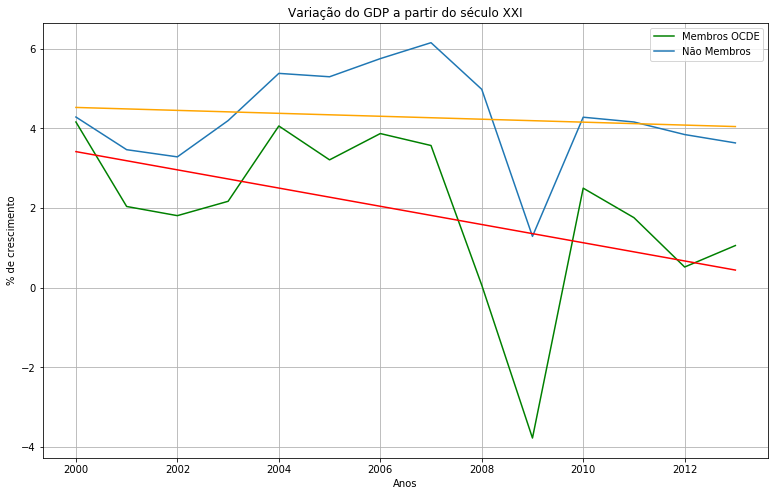

In [40]:
plt.figure(figsize=(13,8))
plt.plot(range(2000, 2014), since21membros3, c = "green", label = "Membros OCDE")
plt.plot(range(2000, 2014), paisesnaomembros3, label = "Não Membros")
plt.legend()
plt.grid(True)
y = since21membros3
x = range(2000, 2014)
b, m1 = polyfit(x, y, 1)
plt.plot(x, b + m1 * x, '-', color="red")
y = paisesnaomembros3
x = range(2000, 2014)
b, m2 = polyfit(x, y, 1)
plt.plot(x, b + m2 * x, '-', color="orange")
plt.title("Variação do GDP a partir do século XXI")
plt.ylabel("% de crescimento")
plt.xlabel("Anos")
plt.show()

In [18]:
coefmembros1 = m1
coefnaomembros2 = m2
print(coefmembros1, coefnaomembros2)

-0.22862967032967343 -0.0369120879120914


#### Entre 2008 e 2009 pode observar uma forte queda no crescimento economico, chegando a um GDP negativo em % de crescimento. Isso pode ser explicado pela crise imobiliaria mundial, que afetou a maioria dos países. Ademais é possível dizer que os dois crescimentos estão caindo, e de acordo com os coeficientes angulares, os países membros estão caindo mais que os não membros.

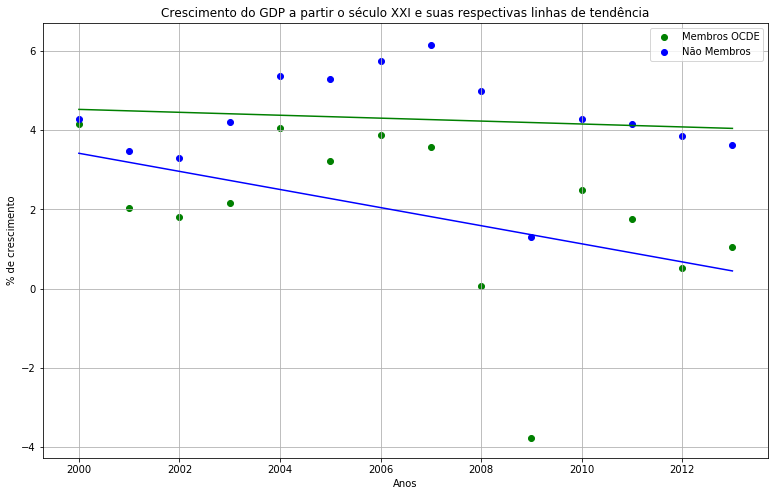

In [19]:
#linhas de tendencias do crescimento de GDP para os paises membros e não membros:

plt.figure(figsize=(13,8))
plt.scatter(range(2000, 2014), since21membros3, c = "green", label = "Membros OCDE")
plt.scatter(range(2000, 2014), paisesnaomembros3, c = "blue", label = "Não Membros")
plt.legend()
plt.grid(True)
y = since21membros3
x = range(2000, 2014)
b, m3 = polyfit(x, y, 1)
plt.plot(x, b + m3 * x, '-', color="blue")
y = paisesnaomembros3
x = range(2000, 2014)
b, m4 = polyfit(x, y, 1)
plt.plot(x, b + m4 * x, '-', color="green")
plt.title("Crescimento do GDP a partir o século XXI e suas respectivas linhas de tendência")
plt.ylabel("% de crescimento")
plt.xlabel("Anos")
plt.show()

### O gráfico acima pode nos mostrar que apesar dos dois grupos estarem caindo em crescimento, os paises membros da OCDE estão caindo mais lentamente.

## Crescimento do GDP total por % de novos empregados na industria.

####  Nova base de dados que será utilizada para comparar com a anterior:  https://www.gapminder.org/data/

In [20]:
dataempregados = pd.read_excel('employmentworkers.xlsx')

In [21]:
dataempregados

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.40,NaN,NaN,NaN,16.60,NaN,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.80,19.90,20.60,18.90,17.30,16.80,17.40,18.60,NaN,19.4
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30.90,NaN,29.60,30.40,29.80,30.3,30.9
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.01,2.78,NaN,NaN,6.13,NaN,NaN,NaN
4,Antigua and Barbuda,NaN,NaN,NaN,19.4,21.2,21.10,19.0,NaN,NaN,...,15.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.90,23.10,23.90,24.90,23.90,24.10,24.60,NaN,NaN,22.4
6,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.80,17.10,17.40,16.70,17.70,17.00,16.70,15.90,15.8,NaN
7,Australia,36.4,36.80,35.2,35.5,35.2,33.50,33.2,32.4,31.2,...,21.60,21.10,21.00,20.80,20.70,20.40,21.00,20.10,20.1,19.4
8,Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.20,25.00,24.90,26.00,26.10,25.90,25.80,25.80,25.6,24.9
9,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.10,12.70,13.70,14.10,14.30,14.40,14.30,14.10,14.3,14.4


In [22]:
dataempregados = dataempregados.set_index("country")

In [23]:
listapaisesmembros = ["United States", "Mexico", "Japan", "Germany", "Turkey", "United Kingdom", "France", "Italy",
                            "South Korea", "Spain", "Poland", "Canada", "Australia", "Chile", "Netherlands", "Belgium",
                            "Czech Republic", "Greece", "Portugal", "Sweden", "Hungary", "Austria", "Switzerland",
                            "Denmark", "Finland", "Slovakia", "Norway", "Ireland", "New Zealand", "Estonia", "Luxembourg",
                            "Ireland"]

In [24]:
dataempregados["OCDE"] = [int(country in listapaisesmembros) for country in dataempregados.index.tolist()]

In [25]:
dataempregados

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,OCDE
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,16.60,NaN,NaN,NaN,NaN,NaN,0
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.90,20.60,18.90,17.30,16.80,17.40,18.60,NaN,19.4,0
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30.90,NaN,29.60,30.40,29.80,30.3,30.9,0
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.01,2.78,NaN,NaN,6.13,NaN,NaN,NaN,0
Antigua and Barbuda,NaN,NaN,NaN,19.4,21.2,21.10,19.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.10,23.90,24.90,23.90,24.10,24.60,NaN,NaN,22.4,0
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.10,17.40,16.70,17.70,17.00,16.70,15.90,15.8,NaN,0
Australia,36.4,36.80,35.2,35.5,35.2,33.50,33.2,32.4,31.2,31.2,...,21.10,21.00,20.80,20.70,20.40,21.00,20.10,20.1,19.4,1
Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.00,24.90,26.00,26.10,25.90,25.80,25.80,25.6,24.9,1


In [26]:

dataempregadosocde = dataempregados.loc[listapaisesmembros, :]

In [27]:
dataempregadosocde

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,OCDE
country,,,,,,,,,,,,,,,,,,,,,
United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,19.7,19.70,19.7,20.0,20.0,19.9,19.8,19.70,1.0
Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.1,24.2,24.10,23.8,24.1,24.6,25.0,25.6,25.80,1.0
Japan,35.7,36.0,36.3,37.2,37.0,35.9,35.8,35.4,35.0,34.9,...,26.0,25.4,8.03,25.9,25.8,24.8,25.5,25.2,25.10,1.0
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.8,28.3,28.20,28.2,27.8,28.1,27.7,27.4,27.40,1.0
Turkey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.3,26.2,26.50,26.0,26.4,27.9,27.2,26.8,26.50,1.0
United Kingdom,44.8,43.8,42.9,42.4,42.2,39.9,39.0,38.9,38.6,38.2,...,19.5,19.1,19.00,18.9,18.7,18.8,18.5,18.4,18.10,1.0
France,38.7,38.7,38.8,39.0,38.9,38.1,37.5,37.0,36.3,35.8,...,22.6,22.1,22.10,21.7,21.1,20.3,20.1,20.0,20.20,1.0
Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.8,37.5,37.1,...,29.2,28.6,28.30,27.6,27.1,26.9,26.6,26.1,26.00,1.0
South Korea,17.5,17.9,18.3,20.0,22.0,23.8,26.4,27.5,29.5,30.1,...,24.5,25.0,24.90,24.6,24.5,24.8,25.2,25.0,25.10,1.0


In [28]:
since21dataempregadosocde = dataempregadosocde

In [29]:
# Separando apenas os dados a partir do século XXI:
start=2000
end=2014

intervalo = np.arange(start, end, 1)
since21dataempregadosocde2 = since21dataempregadosocde.loc[:,intervalo]


In [30]:
since21dataempregadosocde2

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
country,,,,,,,,,,,,,,
United States,24.4,23.7,22.7,22.5,22.4,22.3,22.4,22.1,21.5,20.0,19.7,19.70,19.7,20.0
Mexico,27.0,26.0,29.7,29.4,29.5,25.7,25.9,26.0,25.3,24.1,24.2,24.10,23.8,24.1
Japan,31.2,30.5,29.7,29.3,28.4,27.5,NaN,27.9,26.9,26.0,25.4,8.03,25.9,25.8
Germany,33.5,32.8,32.4,31.4,31.3,29.8,29.6,29.9,29.3,28.8,28.3,28.20,28.2,27.8
Turkey,NaN,NaN,NaN,NaN,NaN,NaN,26.8,26.8,NaN,25.3,26.2,26.50,26.0,26.4
United Kingdom,25.1,24.6,23.9,23.3,22.2,22.2,22.0,22.1,21.9,19.5,19.1,19.00,18.9,18.7
France,26.3,26.0,25.4,23.9,24.2,23.7,23.8,23.3,23.1,22.6,22.1,22.10,21.7,21.1
Italy,31.8,31.7,31.6,31.8,30.8,30.7,30.1,30.1,29.8,29.2,28.6,28.30,27.6,27.1
South Korea,28.1,27.5,27.3,27.6,27.5,26.9,26.3,25.9,25.5,24.5,25.0,24.90,24.6,24.5


In [31]:
dataempregadosnaomembros = dataempregados.drop(["United States", "Mexico", "Japan", "Germany", "Turkey", "United Kingdom", "France", "Italy","South Korea", "Spain", "Poland", "Canada", "Australia", "Chile", "Netherlands", "Belgium","Czech Republic", "Greece", "Portugal", "Sweden", "Hungary", "Austria", "Switzerland","Denmark", "Finland", "Norway", "Ireland", "New Zealand", "Estonia", "Luxembourg"])

In [32]:
dataempregadosnaomembros

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,OCDE
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,16.60,NaN,NaN,NaN,NaN,NaN,0
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.90,20.60,18.90,17.30,16.80,17.40,18.60,NaN,19.4,0
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30.90,NaN,29.60,30.40,29.80,30.3,30.9,0
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.01,2.78,NaN,NaN,6.13,NaN,NaN,NaN,0
Antigua and Barbuda,NaN,NaN,NaN,19.40,21.20,21.10,19.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.10,23.90,24.90,23.90,24.10,24.60,NaN,NaN,22.4,0
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.10,17.40,16.70,17.70,17.00,16.70,15.90,15.8,NaN,0
Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.70,13.70,14.10,14.30,14.40,14.30,14.10,14.3,14.4,0
Bahamas,NaN,NaN,NaN,16.50,NaN,9.21,NaN,11.8,NaN,16.0,...,16.00,NaN,12.90,NaN,NaN,NaN,NaN,NaN,NaN,0


In [33]:
# Separando apenas os dados a partir do século XXI:

start=2000
end=2014

intervalo = np.arange(start, end, 1)
dataempregadosnaomembros2 = dataempregadosnaomembros.loc[:,intervalo]

In [34]:
dataempregadosnaomembros2

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
country,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.40,NaN,NaN,NaN,16.60,NaN
Albania,6.65,6.49,13.7,13.4,13.60,13.50,13.50,22.6,17.80,19.90,20.60,18.90,17.30,16.80
Algeria,NaN,24.30,NaN,24.0,26.00,NaN,NaN,NaN,NaN,NaN,NaN,30.90,NaN,29.60
Angola,NaN,NaN,NaN,NaN,9.10,NaN,NaN,NaN,NaN,NaN,3.01,2.78,NaN,NaN
Antigua and Barbuda,NaN,NaN,15.6,15.6,15.60,15.60,15.60,15.6,15.60,NaN,NaN,NaN,NaN,NaN
Argentina,22.70,21.90,20.2,21.6,22.60,23.20,23.60,NaN,23.90,23.10,23.90,24.90,23.90,24.10
Armenia,NaN,NaN,17.0,NaN,NaN,NaN,NaN,19.0,16.80,17.10,17.40,16.70,17.70,17.00
Azerbaijan,10.90,10.80,11.5,12.9,11.90,12.10,12.30,12.6,12.10,12.70,13.70,14.10,14.30,14.40
Bahamas,NaN,17.00,16.6,15.8,16.10,17.80,18.40,17.9,16.20,16.00,NaN,12.90,NaN,NaN


In [35]:
since21dataempregadosocde3 = since21dataempregadosocde2.median(axis=0, skipna = True)
dataempregadosnaomembros3 = dataempregadosnaomembros2.median (axis=0, skipna = True)

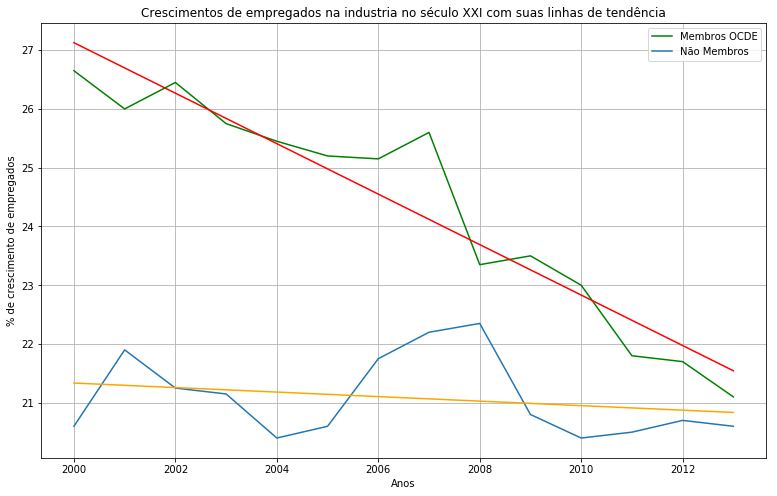

In [36]:
plt.figure(figsize=(13,8))
plt.plot(range(2000, 2014), since21dataempregadosocde3, c = "green", label = "Membros OCDE")
plt.plot(range(2000, 2014), dataempregadosnaomembros3,  label = "Não Membros")
plt.legend()
plt.grid(True)
y = since21dataempregadosocde3 
x = range(2000, 2014)
b, m5 = polyfit(x, y, 1)
plt.plot(x, b + m5 * x, '-', color="red")
y = dataempregadosnaomembros3 
x = range(2000, 2014)
b, m6 = polyfit(x, y, 1)
plt.plot(x, b + m6 * x, '-', color="orange")
plt.title("Crescimentos de empregados na industria no século XXI com suas linhas de tendência")
plt.ylabel("% de crescimento de empregados")
plt.xlabel("Anos")
plt.show()

In [37]:
coefmembros5 = m5
coefnaomembros6 = m6
print(coefmembros5, coefnaomembros6)

-0.42945054945056366 -0.03846153846154418


### Como se pode observar, o crescimento de empregados na industria está caindo mais aceleradamente para os paises membros do que os não membros, apesar da % de crescimento dos países membros ainda ser maior comparado aos não membros no período analisado.

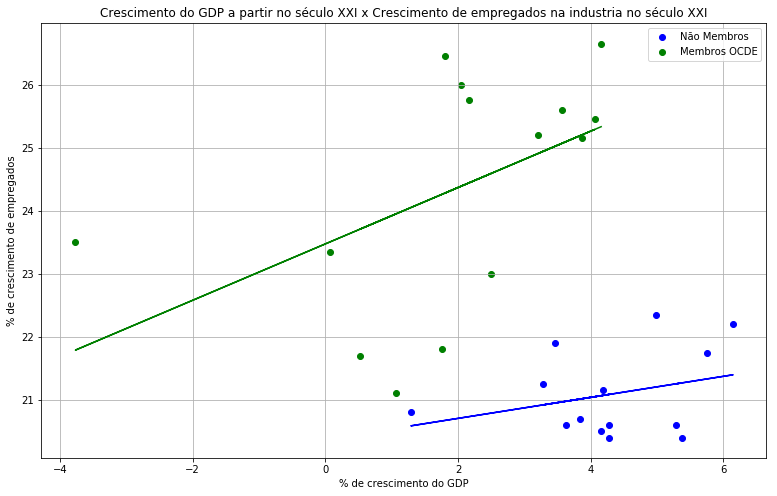

In [42]:
plt.figure(figsize=(13,8))
plt.scatter(paisesnaomembros3, dataempregadosnaomembros3  , c = "blue", label = "Não Membros")
plt.scatter(since21membros3, since21dataempregadosocde3 , c = "green", label = "Membros OCDE")

plt.legend()
plt.grid(True)
x = paisesnaomembros3
y = dataempregadosnaomembros3
b, m7 = polyfit(x, y, 1)
plt.plot(x, b + m7 * x, '-', color="blue")
x = since21membros3
y = since21dataempregadosocde3
b, m8 = polyfit(x, y, 1)
plt.plot(x, b + m8 * x, '-', color="green")
plt.title("Crescimento do GDP a partir no século XXI x Crescimento de empregados na industria no século XXI")
plt.ylabel("% de crescimento de empregados")
plt.xlabel("% de crescimento do GDP")
plt.show()

In [39]:
coefmembros8 = m8
coefnaomembros7 = m7
print(coefmembros8, coefnaomembros7)

0.44695630333727027 0.16668838606137623


### Dado os coeficientes angulares das retas do gráfico acima, podemos observar que o crescimento do número de empregados na indústria para países membros da OCDE em relação ao crescimento de GDP é maior em comparação aos não membros.

# Conclusão:

##  A partir da analise de dados do crescimento de GDP total dos países, pode-se concluir que os paises que entraram na OCDE não tiverem um crescimento maior que os paises de fora do grupo. Porém pode-se concluir que a queda na % de crescimento do GDP dos paises membros do bloco econômico foi menor no período analisado. Ademais foi possível verificar que apesar do  decrescimento do número de empregados na industria durante todo o periodo, a porcentagem de crescimento do mesmo, foi maior nos paises membros do bloco. Com isso podemos dizer que minha hipótese inicial foi refutada. 